<h1>Лабораторная работа "Создание модели машинного обучения"</h1>

Подготовлено на основе издания Андреас Мюллер, Сара Гвидо. Введение в машинное обучение с помощью Python.

## Введение


В этой работе рассмотрим простой пример применения машинного
обучения и построим модель.

Предположим, что ботаник-любитель хочет классифицировать сорта
ирисов, которые он собрал. Он измерил в сантиметрах некоторые
характеристики ирисов: длину и ширину лепестков, а также длину и
ширину чашелистиков.

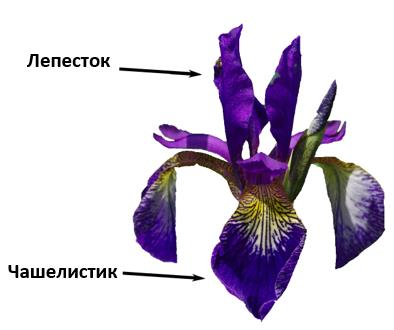

Кроме того, у него есть измерения этих же характеристик ирисов,
которые ранее позволили опытному эксперту отнести их к сортам setosa,
versicolor и virginica. Относительно этих ирисов ботаник-любитель
уверенно может сказать, к какому сорту принадлежит каждый ирис.
Давайте предположим, что перечисленные сорта являются
единственными сортами, которые ботаник-любитель может встретить в
дикой природе.

Цель работы заключается в построении модели машинного обучения,
которая сможет обучиться на основе характеристик ирисов, уже
классифицированных по сортам, и затем предскажет сорт для нового
цветка ириса.

Поскольку у нас есть примеры, по которых мы уже знаем правильные
сорта ириса, решаемая задача является **задачей обучения с учителем**. В
этой задаче нам нужно спрогнозировать один из сортов ириса. Это
пример задачи классификации (*classification*). Возможные ответы
(различные сорта ириса) называются классами (*classes*). Каждый ирис в
наборе данных принадлежит к одному из трех классов, таким образом
решаемая задача является задачей трехклассовой классификации.

Ответом для отдельной точки данных (ириса) является тот или иной
сорт этого цветка. Cорт, к которому принадлежит цветок (конкретная
точка данных), называется меткой (*label*).

# Загружаем данные

Импортируем необходимые библиотеки:

In [1]:
pip install mglearn

  Obtaining dependency information for mglearn from https://files.pythonhosted.org/packages/bb/8b/687d30a3df6b870af541dde6327423e35713e38243db135f57b4ebd054f3/mglearn-0.2.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/bf/5a/e958ac00a4e3099c01a7813c4fa61c47317f75540f56f57adcb53b37bdea/numpy-1.26.3-cp39-cp39-macosx_11_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 277.9 kB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/5c/98/211647fc6aa89355c11b028f37ceae95d7e1bbb99ac363cbf4c4297ef4d7/matplotlib-3.8.2-cp39-cp39-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/00/04/8f40dfc2df5f7e789a145ed99ce8ac49888e0803ac6239a525dbd8cd7eda/scikit_learn-1.4.0-1-cp39-cp39-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for pandas from

In [2]:
!pip install joblib==1.1.1
!pip install scikit-learn==1.1.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 kB 621.0 kB/s eta 0:00:0000:0100:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.3.2
    Uninstalling joblib-1.3.2:
      Successfully uninstalled joblib-1.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-learn 1.4.0 requires joblib>=1.2.0, but you have joblib 1.1.1 which is incompatible.

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 2.4 MB/s eta 0:00:0000:0100:010m
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.0
    Uninstalling scikit-learn-1.4.0:
      Successfully uninstalled scikit-learn-1.4.0

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pi

In [4]:
import pandas as pd
import numpy as np
import matplotlib
import sklearn
import mglearn


Данные, которые мы будем использовать для этого примера, – это набор
данных *Iris*, классический набор данных в машинном обучении и
статистике. Он уже включен в модуль *datasets* библиотеки *scikit-learn*.
Мы можем загрузить его, вызвав функцию *load_iris*:

In [5]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

Строки в массиве data соответствуют цветам ириса, а столбцы
представляют собой четыре признака, которые были измерены для
каждого цветка:

In [6]:
print("Форма массива data: {}".format(iris_dataset['data'].shape))

Форма массива data: (150, 4)


Мы видим, что массив содержит измерения для 150 различных цветов
по 4 признакам. В машинном обучении отдельные
элементы называются примерами (*samples*), а их свойства – характеристиками или признаками (*feature*). Форма (*shape*) массива
данных определяется количеством примеров, умноженным на
количество признаков. Это является общепринятым соглашением в
*scikit-learn*, и ваши данные всегда будут представлены в этой форме.
Ниже приведены значения признаков для первых пяти примеров:

In [7]:
print("Первые пять строк массива data:\n{}".format(iris_dataset['data'][:5]))

Первые пять строк массива data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


Взглянув на эти данные, мы видим, что все пять цветов имеют ширину
лепестка 0.2 см и первый цветок имеет самую большую длину
чашелистика, 5.1 см.


Сорта кодируются как целые числа от 0 до 2: 0 – setosa, 1 – versicolor, а 2 – virginica.

# Метрики эффективности: обучающий и тестовый наборы

На основе этих данных нам нужно построить модель машинного
обучения, которая предскажет сорта ириса для нового набора измерений.
Но прежде, чем мы применить нашу модель к новому набору, мы должны
убедиться в том, что модель на самом деле работает и ее прогнозам можно
доверять.

К сожалению, для оценки качества модели мы не можем использовать
данные, которые были взяты нами для построения модели. Это
обусловлено тем, что наша модель просто запомнит весь обучающий
набор и поэтому она всегда будет предсказывать правильную метку для
любой точки данных в обучающем наборе. Это «запоминание» ничего не
говорит нам об обобщающей способности модели (другими словами, мы
не знаем, будет ли эта модель так же хорошо работать на новых данных).

Для оценки эффективности модели, мы предъявляем ей новые
размеченные данные (размеченные данные, которые она не видела
раньше). Обычно это делается путем разбиения собранных размеченных
данных (в данном случае 150 цветов) на две части. Одна часть данных
используется для построения нашей модели машинного обучения и
называется обучающими данными (training data) или обучающим
набором (training set). Остальные данные будут использованы для
оценки качества модели, их называют тестовыми данными (test data),
тестовым набором (test set) или контрольным набором (hold-out set).

В библиотеке scikit-learn есть функция train_test_split, которая
перемешивает набор данных и разбивает его на две части. Эта функция
отбирает в обучающий набор 75% строк данных с соответствующими
метками. Оставшиеся 25% данных с метками объявляются тестовым
набором. Вопрос о том, сколько данных отбирать в обучающий и
тестовый наборы, является дискуссионным, однако использование
тестового набора, содержащего 25% данных, является хорошим
правилом.

В scikit-learn данные, как правило, обозначаются заглавной X, тогда
как метки обозначаются строчной у. Это навеяно стандартной
математической формулой f(х)=у, где х является аргументом функции, а
у – выводом. В соответствии с некоторыми математическими
соглашениями мы используем заглавную X, потому что данные
представляют собой двумерный массив (матрицу) и строчную у, потому
что целевая переменная – это одномерный массив (вектор).

Давайте вызовем функцию train_test_split для наших данных и
зададим обучающие данные, обучающие метки, тестовые данные,
тестовые метки, используя вышеупомянутые буквы:

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
iris_dataset['data'], iris_dataset['target'], random_state=0)

Перед разбиением функция train_test_split перемешивает набор
данных с помощью генератора псевдослучайных чисел. Если мы просто
возьмем последние 25% наблюдений в качестве тестового набора, все
точки данных будет иметь метку 2, поскольку все точки данных
отсортированы по меткам (смотрите вывод для iris['target'],
показанный ранее). Используя тестовый набор, содержащий только один
из трех классов, вы не сможете объективно судить об обобщающей
способности модели, таким образом, мы перемешиваем наши данные,
чтобы тестовые данные содержали все три класса.

Чтобы в точности повторно воспроизвести полученный результат, мы
воспользуемся генератором псевдослучайных чисел с фиксированным
стартовым значением, которое задается с помощью параметра
random_state. Это позволит сделать результат воспроизводим, поэтому
вышеприведенный программный код будет генерировать один и тот же
результат.

Выводом функции train_test_split являются X_train, X_test,
y_train и y_test, которые все являются массивами Numpy. X_train
содержит 75% строк набора данных, а X_test содержит оставшиеся 25%:

In [9]:

print("форма массива X_train: {}".format(X_train.shape))
print("форма массива y_train: {}".format(y_train.shape))

форма массива X_train: (112, 4)
форма массива y_train: (112,)


In [10]:
print("форма массива X_test: {}".format(X_test.shape))
print("форма массива y_test: {}".format(y_test.shape))

форма массива X_test: (38, 4)
форма массива y_test: (38,)


# Посмотрим на данные

Перед тем как строить модель машинного обучения, неплохо было бы
исследовать данные, чтобы понять, можно ли легко решить поставленную
задачу без машинного обучения или содержится ли нужная информация
в данных.

Кроме того, исследование данных – это хороший способ обнаружить
аномалии и особенности. Например, вполне возможно, что некоторые из
ваших ирисов измерены в дюймах, а не в сантиметрах. В реальном мире
нестыковки в данных и неожиданности очень распространены.

Один из лучших способов исследовать данные – визуализировать их.
Это можно сделать, используя диаграмму рассеяния (*scatter plot*). В
диаграмме рассеяния один признак откладывается по оси х, а другой
признак – по оси у, каждому наблюдению соответствует точка. К
сожалению, экран компьютера имеют только два измерения, что
позволяет разместить на графике только два (или, возможно, три)
признака одновременно. Таким образом, трудно разместить на графике
наборы данных с более чем тремя признаками. Один из способов
решения этой проблемы – построить матрицу диаграмм рассеяния
(*scatterplot matrix*) или парные диаграммы рассеяния (*pair plots*), на
которых будут изображены все возможные пары признаков. Если у вас
есть небольшое число признаков, например, четыре, как здесь, то
использование матрицы диаграмм рассеяния будет вполне разумным.
Однако, вы должны помнить, что матрица диаграмм рассеяния не
показывает взаимодействие между всеми признаками сразу, поэтому
некоторые интересные аспекты данных не будут выявлены с помощью
этих графиков.

Ниже мы создали матрицу диаграмм рассеяния для
признаков обучающего набора. Точки данных окрашены в соответствии
с сортами ириса, к которым они относятся. Чтобы построить диаграммы,
мы сначала преобразовываем массив NumPy в DataFrame (основный тип
данных в библиотеке pandas). В pandas есть функция для создания
парных диаграмм рассеяния под названием scatter_matrix. По
диагонали этой матрицы располагаются гистограммы каждого признака:

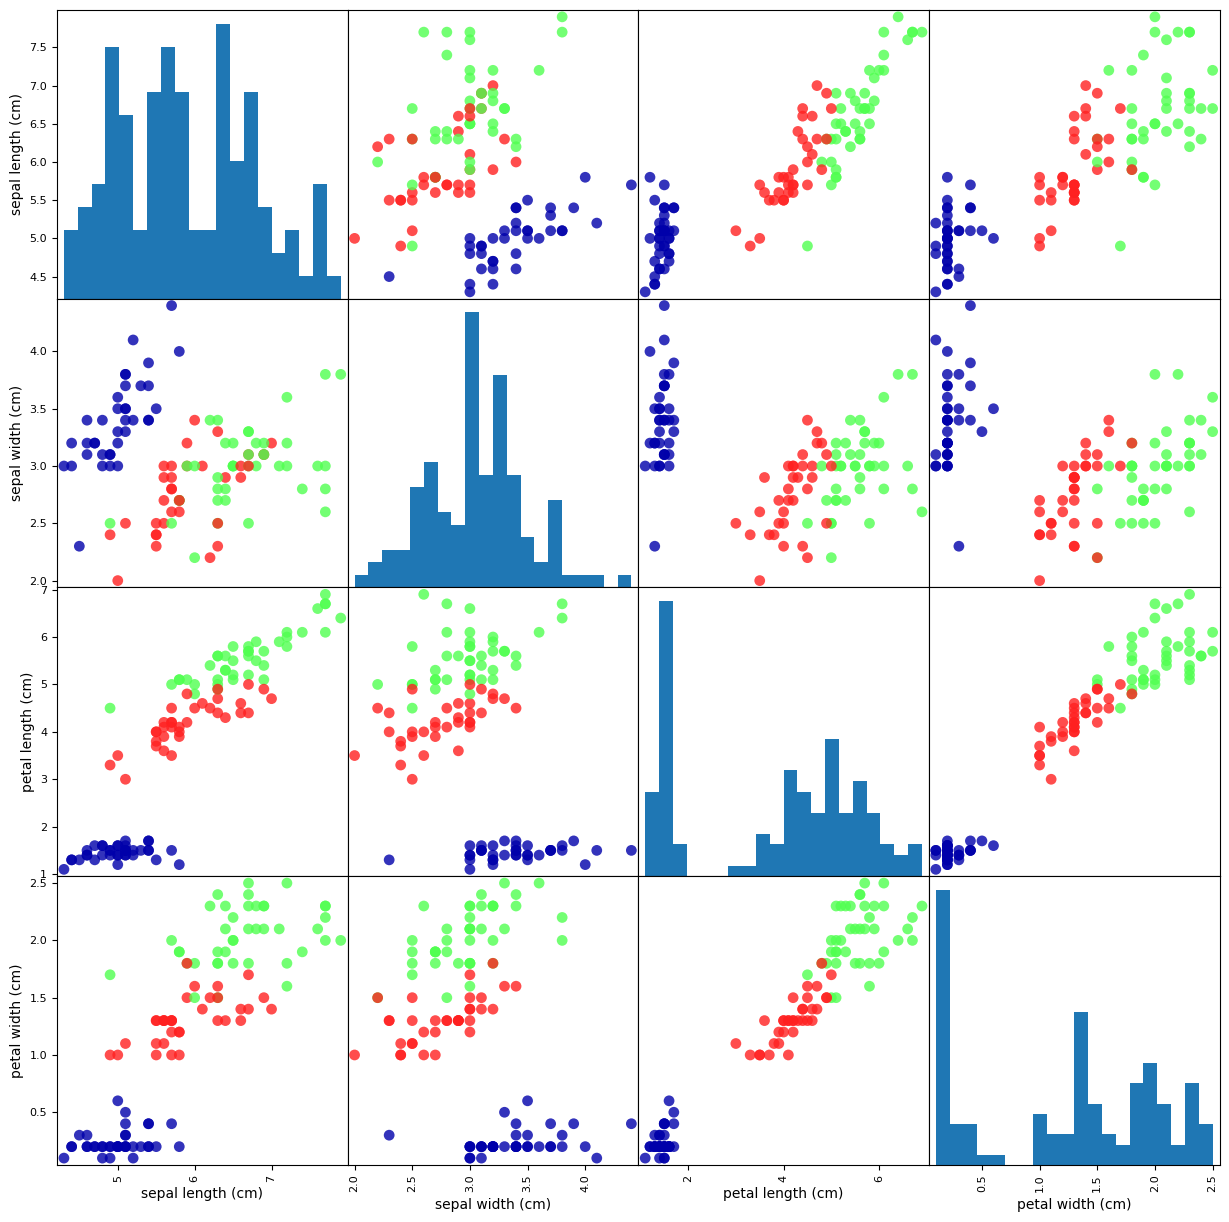

In [11]:
# создаем dataframe из данных в массиве X_train
# маркируем столбцы, используя строки в iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# создаем матрицу рассеяния из dataframe, цвет точек задаем с помощью y_train
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',
hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

Взглянув на график, мы можем увидеть, что, похоже, измерения
чашелистиков и лепестков позволяют относительно хорошо разделить
три класса. Это означает, что модель машинного обучения, вероятно,
сможет научиться разделять их.

# Построение модели: метод *k* ближайших соседей

Теперь мы можем начать строить реальную модель машинного обучения.
В библиотеке scikit-learn имеется довольно много алгоритмов
классификации, которые мы могли бы использовать для построения
модели. В данном примере мы будем использовать классификатор на
основе метода k ближайших соседей, который легко интерпретировать.
Построение этой модели заключается лишь в запоминании обучающего
набора. Для того, чтобы сделать прогноз для новой точки данных,
алгоритм находит точку в обучающем наборе, которая находится ближе
всего к новой точке. Затем он присваивает метку, принадлежащую этой
точке обучающего набора, новой точке данных.

k в методе k ближайших соседей означает, что вместо того, чтобы
использовать лишь ближайшего соседа новой точки данных, мы в ходе
обучения можем рассмотреть любое фиксированное число (k) соседей
(например, рассмотреть ближайшие три или пять соседей). Тогда мы
можем сделать прогноз для точки данных, используя класс, которому
принадлежит большинство ее соседей.

В scikit-learn все модели машинного обучения реализованы в
собственных классах, называемых классами Estimator. Алгоритм
классификации на основе метода k ближайших соседей реализован в
классификаторе *KNeighborsClassifier* модуля *neighbors*. Прежде чем
использовать эту модель, нам нужно создать объект-экземпляр класса.
Это произойдет, когда мы зададим параметры модели. Самым важным
параметром *KNeighborsClassifier* является количество соседей, которые
мы установим равным 1:

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

Объект knn включает в себя алгоритм, который будет использоваться
для построения модели на обучающих данных, а также алгоритм,
который сгенерирует прогнозы для новых точек данных. Он также будет
содержать информацию, которую алгоритм извлек из обучающих
данных. В случае с KNeighborsClassifier он будет просто хранить
обучающий набор.

Для построения модели на обучающем наборе, мы вызываем метод
fit объекта knn, который принимает в качестве аргументов массив
NumPy X_train, содержащий обучающие данные, и массив NumPy
y_train, соответствующий обучающим меткам:

In [13]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

Метод fit возвращает сам объект knn (и изменяет его), таким образом,
мы получаем строковое представление нашего классификатора. Оно
показывает нам, какие параметры были использованы при создании
модели.

# Получение прогнозов

Теперь мы можем получить прогнозы, применив эту модель к новым
данным, по которым мы еще не знаем правильные метки. Представьте,
что мы нашли в дикой природе ирис с длиной чашелистика 5 см,
шириной чашелистика 2.9 см, длиной лепестка 1 см и шириной лепестка 0.2 см. К какому сорту ириса нужно отнести этот цветок? Мы можем поместить эти данные в массив NumPy, снова вычисляя форму массива, т.е. количество примеров (1), умноженное на количество признаков (4):

In [20]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print(f"форма массива X_new: {X_new.shape}")

форма массива X_new: (1, 4)


Обратите внимание, что мы записали измерения по одному цветку в
двумерный массив NumPy, поскольку scikit-learn работает с
двумерными массивами данных.
Чтобы сделать прогноз, мы вызываем метод predict объекта knn:

In [15]:
prediction = knn.predict(X_new)
print("Прогноз: {}".format(prediction))
print("Спрогнозированная метка: {}".format(
iris_dataset['target_names'][prediction]))

Прогноз: [0]
Спрогнозированная метка: ['setosa']


Наша модель предсказывает, что этот новый цветок ириса
принадлежит к классу 0, что означает сорт setosa. Но как узнать, можем ли мы доверять нашей модели?

# Оценка качества модели

Это тот самый момент, когда нам понадобится созданный ранее тестовый
набор. Эти данные не использовались для построения модели, но мы
знаем правильные сорта для каждого ириса в тестовом наборе.

Таким образом, мы можем сделать прогноз для каждого ириса в
тестовом наборе и сравнить его с фактической меткой (уже известным
сортом). Мы можем оценить качество модели, вычислив правильность
(accuracy) – процент цветов, для которых модель правильно
спрогнозировала сорта:

In [21]:
y_pred = knn.predict(X_test)
print(f"Прогнозы для тестового набора:\n {y_pred}")

Прогнозы для тестового набора:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [17]:
print("Правильность на тестовом наборе: {:.2f}".format(np.mean(y_pred == y_test)))

Правильность на тестовом наборе: 0.97


Кроме того, мы можем использовать метод score объекта knn, который
вычисляет правильность модели для тестового набора:

In [18]:
print("Правильность на тестовом наборе: {:.2f}".format(knn.score(X_test, y_test)))

Правильность на тестовом наборе: 0.97


Правильность этой модели для тестового набора составляет около
0.97, что означает, что мы дали правильный прогноз для 97% ирисов в
тестовом наборе. При некоторых математических допущениях, это
означает, что мы можем ожидать, что наша модель в 97% случаев даст
правильный прогноз для новых ирисов. Этот высокий уровень правильности означает, что наша модель может быть достаточно надежной в использовании.

# Выводы и перспективы

В результате выполнения работы мы выполнили следующие действия:

1. Сформулировали задачу классификации ирисов на основе проведенных измерений характеристик цветов.

2. Использовали набор данных, в котором эксперт уже
предварительно классифицировал ирисы для построения модели, таким
образом, мы решали задачу обучения с учителем. Было три возможных
сорта ирисов – setosa, versicolor и virginica, что делало нашу задачу
задачей 3-классовой классификации. В задаче классификации
возможные сорта ирисов называются классами (classes) а сами названия
сортов – метками (labels).

Набор данных Iris состоит из двух массивов NumPy: один содержит
данные и в scikit-learn обозначается как X, другой содержит
правильные или нужные ответы и обозначается как y. Массив Х
представляет собой двумерный массив признаков, в котором одна строка
соответствует одной точке данных, а один столбец – одному признаку.
Массив у представляет собой одномерный массив, который для каждого
примера содержит метку класса, целое число от 0 до 2.

3. Разделили наш набор данных на обучающий набор (training set),
чтобы построить нашу модель, а также тестовый набор (test set), чтобы
оценить, насколько хорошо наша модель будет классифицировать новые,
ранее незнакомые ей данные.

4. Выбрали алгоритм классификации k ближайших соседей,
который генерирует прогноз для новой точки данных, рассматривая ее
ближайшего соседа(ей) в обучающем наборе. Все это реализовано в
классе KNeighborsClassifier, который содержит алгоритм, строящий
модель, а также алгоритм, который дает прогнозы, используя
построенную модель.

5. Создали объект-экземпляр класса, задав параметры. Затем построили модель, вызвав метод fit и передав обучающие данные (X_train) и обучающие ответы (y_train) в качестве параметров.

6. Оценили качество модели с использованием метода score, который вычисляет правильность модели. Мы применили метод score к тестовым данным и тестовым ответам и обнаружили, что наша модель демонстрирует правильность около 97%. Это означает, что модель выдает правильные прогнозы для 97% наблюдений тестового набора.

# Итоги лабораторной работы

Работу выполнил (ФИО студента, номер группы):

Талғатұлы Әділ

Дата выполнения работы:

...

## Анализ работы программы

Запустите на выполнение последовательно каждую ячейку с кодом. Прочитайте пояснения работы команд.

Составьте алгоритм работы программы (машинного обечения) в словесной (произвольной) форме.
Напишите его ниже:

...

## Создание модели определения типа вина по химическим свойствам

На основе программного кода модели распознавания ирисов создайте модель распознавания вина по химическим свойствам. Для этого воспользуйтесь учебным набором данных wine, который включен в модуль datasets библиотеки scikit-learn. Чтобы загрузить его, используйте функцию load_wine.
Программный код напишите ниже:

In [24]:
# Здесь разместите программный код модели распознавания вина (начиная
# с подготовки данных до вывода показателя правильности модели).
# Значение k в методе k ближайших соседей установите равным порядковому номеру
# первой буквы вашей фамилии плюс 23.
# В разделе "получение прогнозов" укажите значения 13 характеристик химических
# свойств вина вместо 4 характеристик у ирисов.
from sklearn.datasets import load_wine
wine_dataset = load_wine()

In [26]:
print(f"Форма массива wine_dataset: {wine_dataset['data'].shape}")

Форма массива wine_dataset: (178, 13)


In [30]:
wine_dataset['data'][:5]

array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
        2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, 1.860e+01, 1.010e+02, 2.800e+00,
        3.240e+00, 3.000e-01, 2.810e+00, 5.680e+00, 1.030e+00, 3.170e+00,
        1.185e+03],
       [1.437e+01, 1.950e+00, 2.500e+00, 1.680e+01, 1.130e+02, 3.850e+00,
        3.490e+00, 2.400e-01, 2.180e+00, 7.800e+00, 8.600e-01, 3.450e+00,
        1.480e+03],
       [1.324e+01, 2.590e+00, 2.870e+00, 2.100e+01, 1.180e+02, 2.800e+00,
        2.690e+00, 3.900e-01, 1.820e+00, 4.320e+00, 1.040e+00, 2.930e+00,
        7.350e+02]])

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wine_dataset['data'], wine_dataset['target'], random_state=0)

In [35]:
print(f"Форма массива X_train: {X_train.shape}")
print(f"Форма массива y_train: {y_train.shape}")

Форма массива X_train: (133, 13)
Форма массива y_train: (133,)


In [36]:
print(f"Форма массива X_test: {X_test.shape}")
print(f"Форма массива y_test: {y_test.shape}")

Форма массива X_test: (45, 13)
Форма массива y_test: (45,)


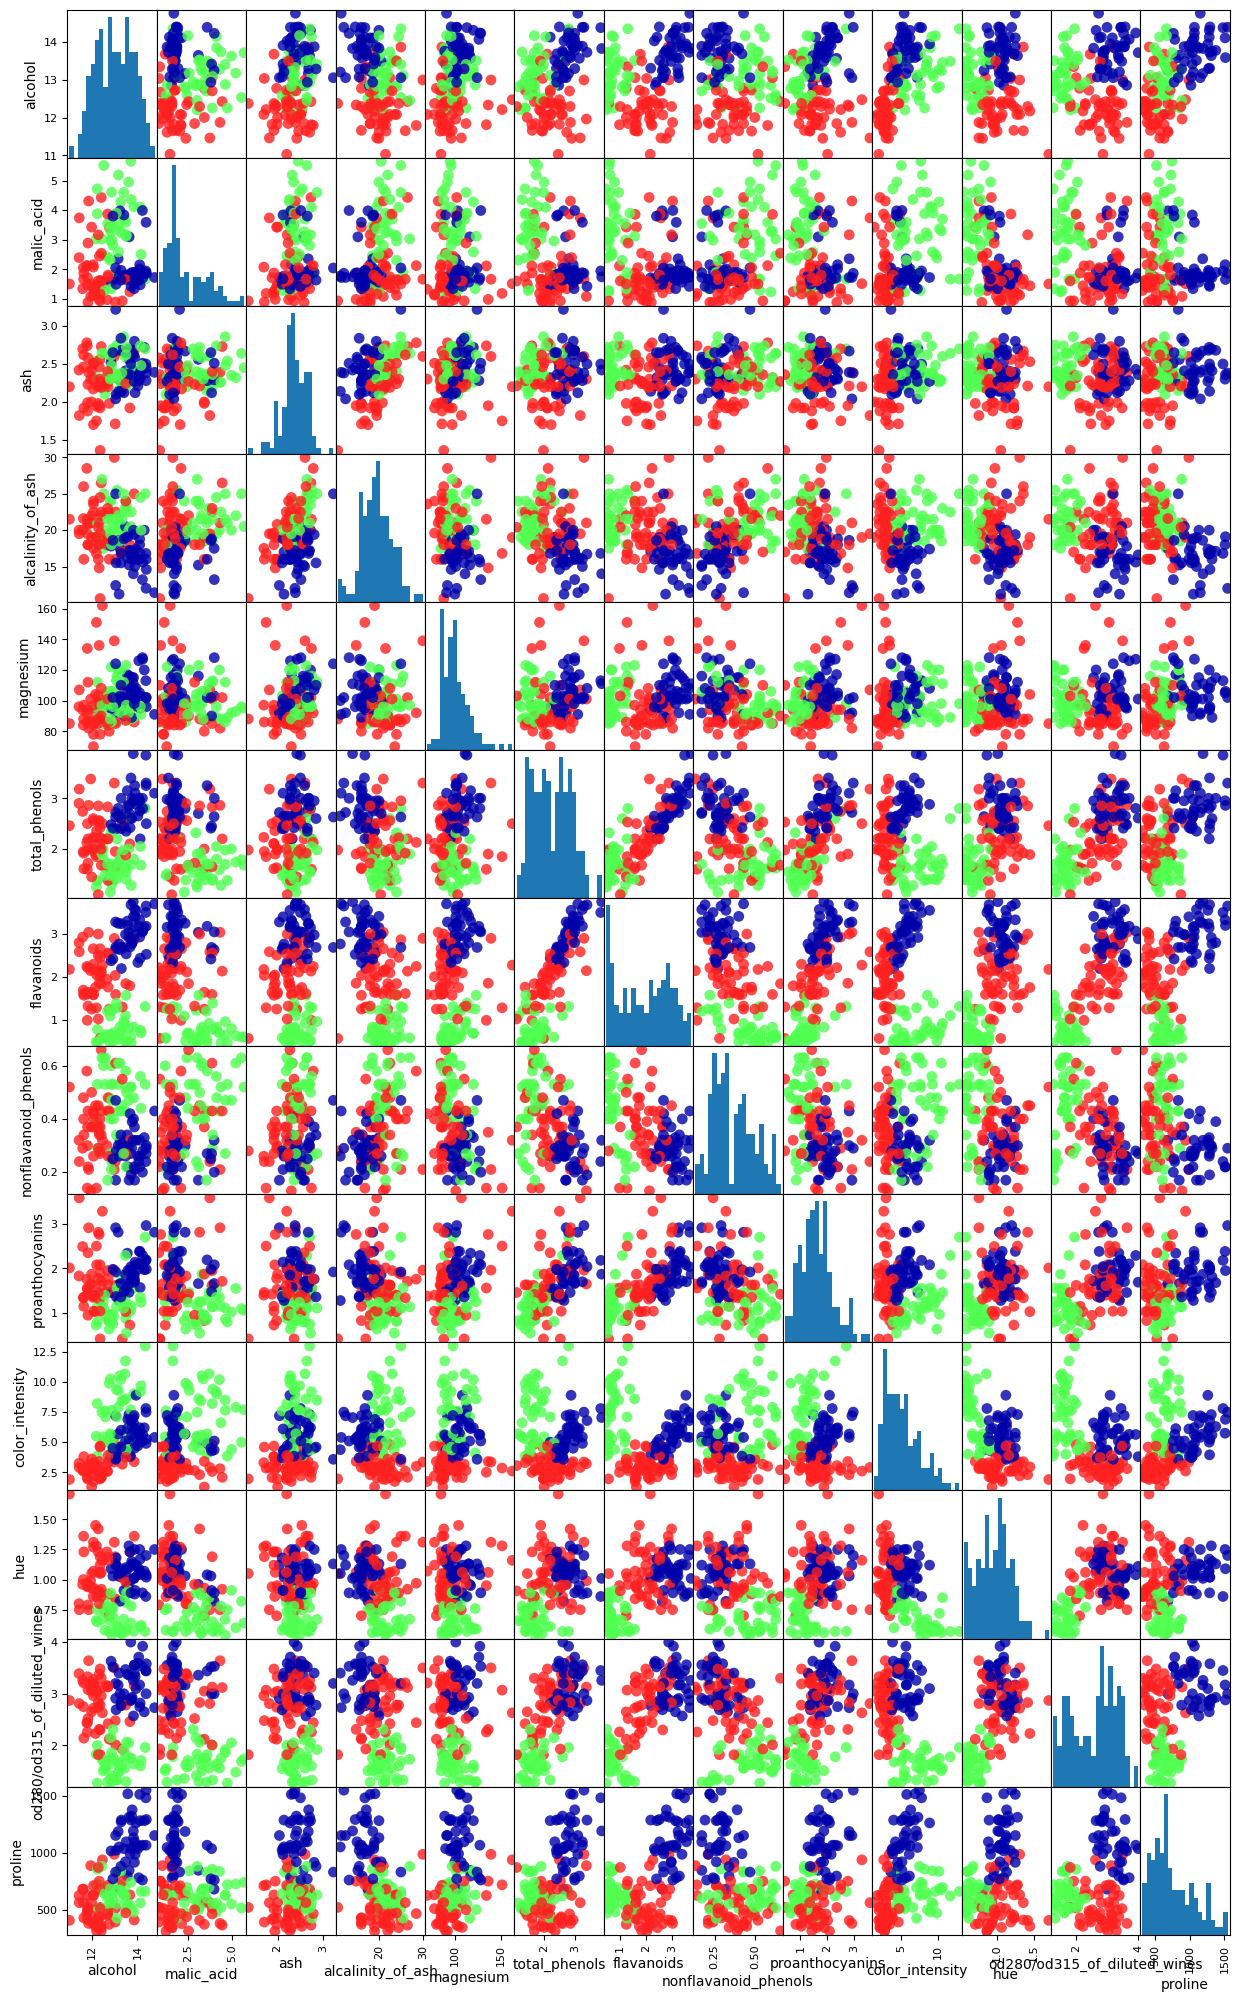

In [37]:
wine_dataframe = pd.DataFrame(X_train, columns=wine_dataset.feature_names)
grr = pd.plotting.scatter_matrix(wine_dataframe, c=y_train, figsize=(15, 25), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

In [84]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=25)

In [85]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [86]:
y_pred = knn.predict(X_test)
print(f"Прогнозы для тестового набора:\n {y_pred}")

Прогнозы для тестового набора:
 [0 1 1 0 1 1 0 2 1 1 2 1 0 2 2 1 0 0 1 0 1 0 2 2 2 1 1 1 2 2 0 0 2 0 0 0 2
 1 1 2 0 0 1 2 1]


In [87]:
print(f"Правильность на тестовом наборе: {knn.score(X_test, y_test)}")

Правильность на тестовом наборе: 0.8


In [88]:
print(f"Правильность на тестовом наборе: {np.mean(y_pred == y_test)}")

Правильность на тестовом наборе: 0.8


Запустите программный код.
Ниже укажите тип вина, который определила модель по вашим значениям:

...

Укажите показатель правильности модели на тестовых данных:


...

## Общий вывод по работе

Напишите, чему вы научились, выполняя эту лабораторную работу:

...